Libraries

In [2]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
np.random.seed(16)

# Data Processing

#CWRU Dataset

3-I-A-  Receive data

In [4]:

from google.colab import files
#uploaded=files.upload()
import io
import gdown
import scipy.io

#data = loadmat(io.BytesIO(uploaded['IR007_3.mat'])
file_id = "1xqzi8UzJBbAjcdVED0tG8qOnGqoppSLC"
output_name = "downloaded_file.mat"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_name, quiet=False)

data = scipy.io.loadmat(output_name)
d = data['X112_DE_time'].squeeze()
l = len(d)
t = np.arange(l)
fs = 48000
t = t/fs

Downloading...
From (original): https://drive.google.com/uc?id=1xqzi8UzJBbAjcdVED0tG8qOnGqoppSLC
From (redirected): https://drive.google.com/uc?id=1xqzi8UzJBbAjcdVED0tG8qOnGqoppSLC&confirm=t&uuid=c5cdb336-d4e4-41d5-b5c4-ac2135b6e207
To: /content/downloaded_file.mat
100%|██████████| 7.77M/7.77M [00:00<00:00, 25.0MB/s]


3-I-B -1 - Showing Signal

Text(0, 0.5, 'X112_DE')

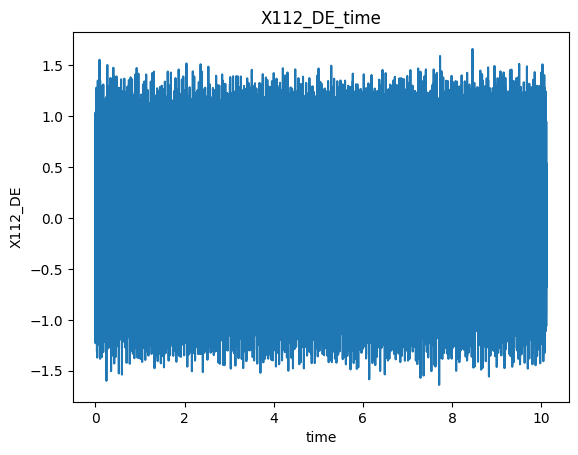

In [ ]:
plt.figure()
plt.plot(t, d)
plt.title("X112_DE_time")
plt.xlabel("time")
plt.ylabel("X112_DE")

3-I-B -2 - Showing Signal

Text(0, 0.5, 'X112_DE')

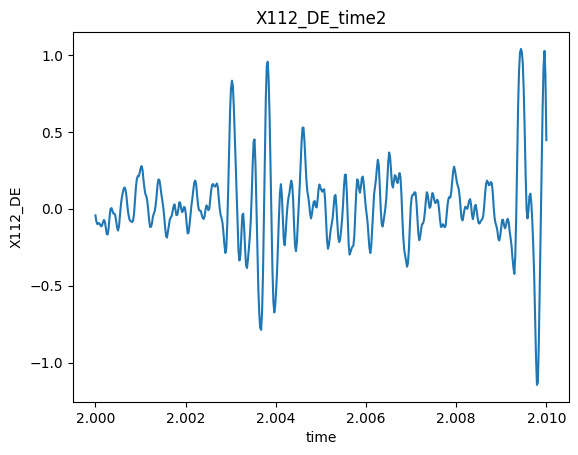

In [ ]:
idx1 = np.where(t == 2)[0][0]
idx2 = np.where(t == 2.01)[0][0]

d1 = d[idx1:idx2]
t1 = np.linspace(2, 2.01, 480)

plt.figure()
plt.plot(t1, d1)
plt.title("X112_DE_time2")
plt.xlabel("time")
plt.ylabel("X112_DE")

3 - I - C - Frequency Analysis

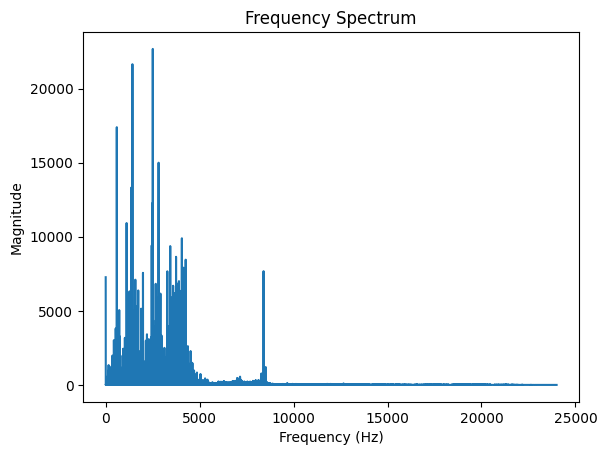

In [ ]:
#def X(k, d, l):
 #   s =0
  #  for i in range(l):
   #     s += d[i] * np.exp(-2j * np.pi * k * i / l)
    #return s


#plt.figure()
#plt.plot(freqs[:l//2], np.abs(X_K[:l//2]))
#plt.title("Frequency Spectrum")
#plt.xlabel("Frequency (Hz)")
#plt.ylabel("Magnitude")

def plot_fft(s,fs):
    l = len(s)
    X_K = np.fft.fft(s)
    freqs = np.fft.fftfreq(l, d=1/fs)
    half_l = l // 2
    X_K_positive = np.abs(X_K[:half_l])
    freqs_positive = freqs[:half_l]

    dominant_index = np.argmax(X_K_positive)
    freq_dominant = freqs_positive[dominant_index]

    plt.figure()
    plt.plot(freqs[:l//2], np.abs(X_K[:l//2]))
    plt.title("Frequency Spectrum")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.show()
    return freq_dominant

dominant_freq = plot_fft(d, fs)

3 - I - D - 1 -Signal segmentation

In [ ]:
X = np.zeros((int(l/128), 128))
for j in range(int(l/128)):
    X[j, :] = d[128*j:128*(j+1)]

3 - I - D - 2 -Signal segmentation **bold text**

Text(0.5, 1.0, '10 differnt Signals from DataFrame')

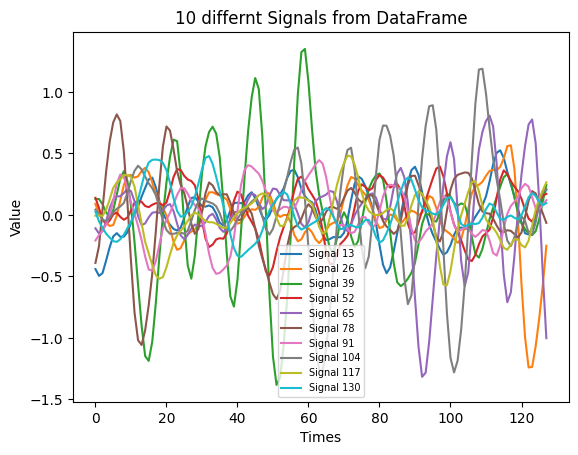

In [ ]:
df_X = pd.DataFrame(X)
f = np.zeros((10,128))
labels = []
for i in range(1,11):
    f[i-1, :] = df_X.iloc[13*i]
    plt.plot(f[i-1, :])
    labels.append(f"Signal {13*i}")

plt.legend(labels, prop={'size':7})
plt.xlabel("Times")
plt.ylabel("Value")
plt.title("10 differnt Signals from DataFrame")

3 - I - F - Feature Extraction

In [ ]:
def feauters(s):
    Mean = np.mean(s)
    Std = np.std(s)
    RMS = np.sqrt(np.mean(s**2))

    return Mean, Std, RMS

mean_value,standard_d,rms = feauters(d)

signal_Featurs = np.array([[mean_value, standard_d, rms]])

df_signal_Featurs = pd.DataFrame(signal_Featurs, columns=['Mean', 'Std', 'RMS'])

df_signal_Featurs.to_csv("signal_Featurs.csv", index=False)


#Iris Dataset

A Initial analysis

In [ ]:
iris_dataset = datasets.load_iris()

X_iris = iris_dataset['data']
Y_iris = iris_dataset['target']
iris_featurs = iris_dataset['feature_names']
iris_target_names = iris_dataset['target_names']


X_irsi_train, X_iris_test = train_test_split(X_iris, test_size=0.2, random_state=16)

df_iris_train = pd.DataFrame(X_irsi_train, columns=iris_featurs)
df_iris_test =  pd.DataFrame(X_iris_test, columns=iris_featurs)

df_iris =pd.concat([df_iris_train, df_iris_test], axis=0, ignore_index=True)
df_iris_feature = df_iris
df_iris['species'] = Y_iris

test_cl = np.array(30*['test'])
train_cl = np.array(120*['train'])
cl = np.concatenate((train_cl, test_cl))
df_cl = pd.DataFrame(cl,columns = ['Test/Train'] )
df_iris_cl = pd.concat([df_iris, df_cl], axis=1, ignore_index=True)

B - 1 Visual data analysis

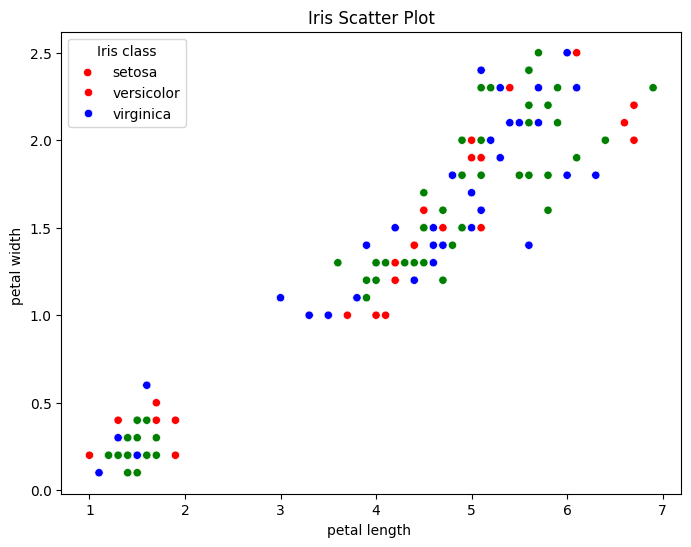

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_iris['petal length (cm)'],
    y=df_iris['petal width (cm)'],
   hue=df_iris['species'].astype(str),
    palette=['red', 'blue', 'green'],
    legend=True
)


plt.xlabel('petal length ')
plt.ylabel('petal width ')
plt.title('Iris Scatter Plot')
plt.legend(labels=iris_target_names, title="Iris class")
plt.show()

B - 2 Visual data analysis

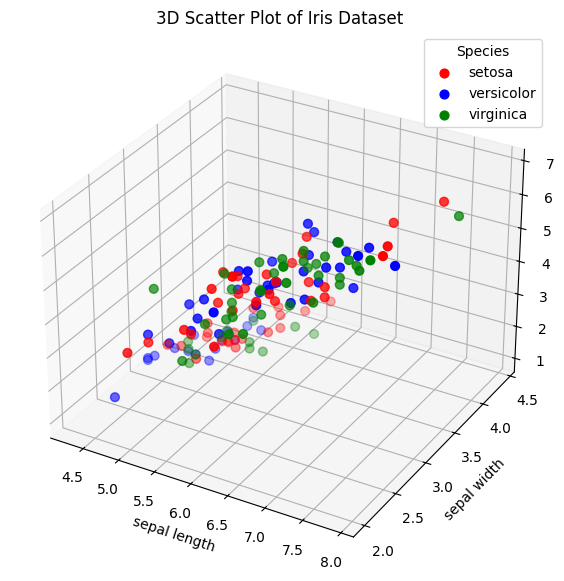

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'blue', 'green']
for species in range(3):
    subset = df_iris[df_iris['species'] == species]
    ax.scatter(
        subset['sepal length (cm)'],
        subset['sepal width (cm)'],
        subset['petal length (cm)'],
        label=iris_target_names[species],
        color=colors[species],
        s=40
    )

ax.set_xlabel('sepal length ')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal length ')
ax.set_title('3D Scatter Plot of Iris Dataset')
ax.legend(title="Species")
plt.show()

B - 3  Visual data analysis

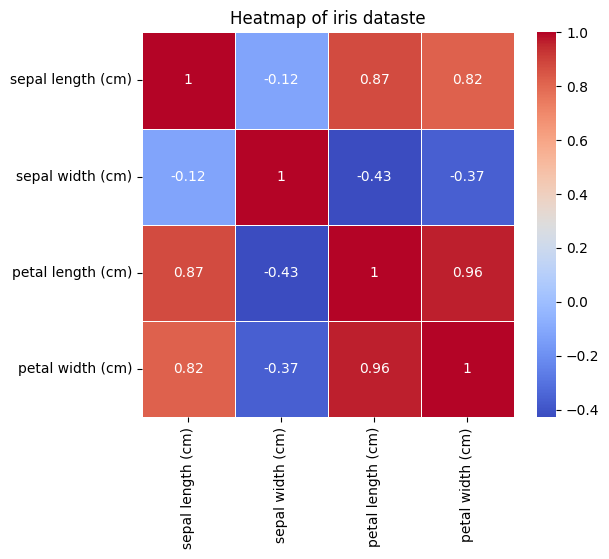

In [ ]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

corr_matrix = df_iris.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of iris dataste')
plt.show()


 B- 4 Visual data analysis

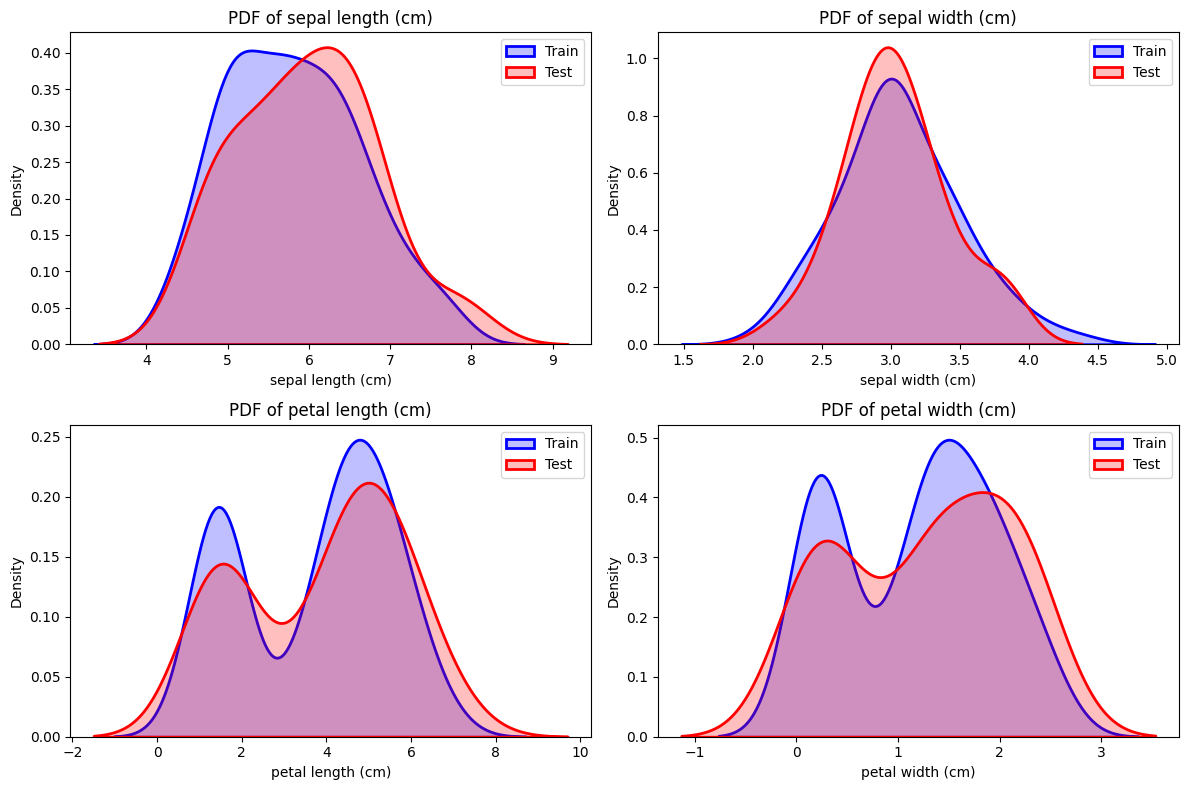

In [ ]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
features = df_iris.columns


for i, ax in enumerate(axes.flat):
    sns.kdeplot(df_iris_train[features[i]], fill=True, color='blue', linewidth=2, ax=ax, label = 'Train')

    sns.kdeplot(df_iris_test[features[i]], fill=True, color='red', linewidth=2, ax=ax, label = 'Test')

    ax.set_title(f'PDF of {features[i]}')
    ax.set_xlabel(features[i])
    ax.set_ylabel('Density')
    ax.legend()

plt.tight_layout()
plt.show()

C - Continuity discretization

In [ ]:
selected = df_iris['petal length (cm)'].values
lower_section  = np.percentile(selected, 33.33)
uper_section = np.percentile(selected, 66.66)

class1 = selected[selected <lower_section]
class2 = selected[(lower_section< selected) & (selected<uper_section)]
class3 = selected [selected >= uper_section]

label1 = np.array(len(class1)*['Short'])
label2 = np.array(len(class2)*['Medium'])
label3 = np.array(len(class3)*['Long'])

dataset = np.concatenate((class1, class2, class3))
labels  = np.concatenate((label1, label2, label3))
#Dataset = np.vstack((dataset, labels)).T
df_Dataset = pd.DataFrame(labels, columns=['class'])

D - Statistical analysis

In [ ]:
setosa_idx = np.where(Y_iris == 0)[0]
Setosa = X_iris[setosa_idx]
df_Setosa = pd.DataFrame(Setosa)

df_Setosa.describe()

,0,1,2,3
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000
